In [37]:
# -*- coding: utf-8 -*-
"""
Created on Wed Aug 10 13:17:46 2022

@author: BetzLab-Admin
"""
import sys
sys.path.append('../../lib')

from time import sleep
from pipython import GCSDevice
from pipython import pitools
from scipy.signal import fftconvolve
import keyboard
from math import cos, sin, pi
import numpy as np
from pycromanager import Core,Studio
from detection_methods import trajectory_corr, trajectory_gauss, trajectory_mean,trajectory_till, trajectory_till_stepwise,most_common_value, compare_trajectories, plt_accuracy_results, trajectory_polar_comparison,save_result, load_result
from detection_methods import make_test_trajectory as make_movie
import matplotlib.pyplot as plt
from scipy.ndimage.filters import maximum_filter
from scipy.ndimage import label
import csv
import random
import os
import pandas as pd
from microscope_functions import snap_image, move_large_stage, calibration_matrix, center_crop, fullscreen, move_stage, beat_to_center

#from pipython.datarectools import getservotime
core=Core()
core.set_exposure(100)


In [2]:
pidevice= GCSDevice('E-727')
STAGES=None
REFMODES=None
core=Core()
pidevice.InterfaceSetupDlg()

pidevice.SVO('1', True)
pidevice.SVO('2', True)
pidevice.SVO('3', True)


In [3]:
move_stage(pidevice, 1, 50)
move_stage(pidevice, 2,50)

In [9]:
fullscreen()

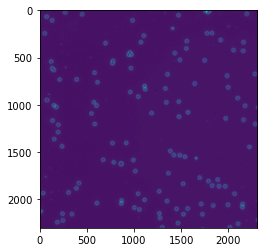

In [10]:
img_0=snap_image()
plt.imshow(img_0)

In [11]:
beat_to_center()


In [12]:
center_crop()

In [25]:

def center_of_mass(img):
    rows, cols = np.indices(img.shape)
    total_weight = img.sum()

    if total_weight == 0:
        return img.shape[0] / 2, img.shape[1] / 2  # Return the geometric center

    com_x = np.sum(cols * img) / total_weight
    com_y = np.sum(rows * img) / total_weight
    
    return com_y, com_x


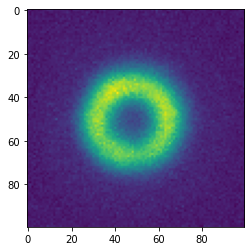

In [14]:
img_1=snap_image()
plt.imshow(img_1)

In [79]:
calibration_file = 'C:\\Users\\BetzLab-Admin\\Desktop\\git-code\\mbr_relevant_code\\callibrations\\small_stage\\small_stage_fixed_calibration_images\\fit_parameters.json'
matrix=calibration_matrix(calibration_file)
pixel_to_motor=np.linalg.inv(matrix)

In [80]:
trajectory=np.array([[0,0],[0,1],[1,1],[1,0],[1,-1],[0,-1],[-1,-1],[-1,0],[-1,1],[0,1],[0,0]])*10
starting_point=np.array([50,50])
motor_positions=[starting_point-pixel_to_motor.dot(point) for point in trajectory]

In [81]:
img_list=[] 
for position in motor_positions:
    move_stage(pidevice, 1, position[0])
    move_stage(pidevice, 2, position[1])
    img_list.append(snap_image())
    sleep(0.1)

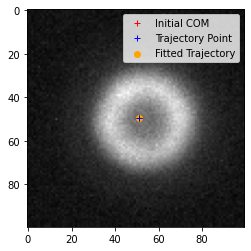

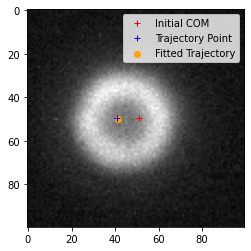

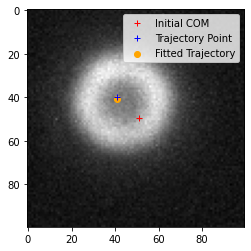

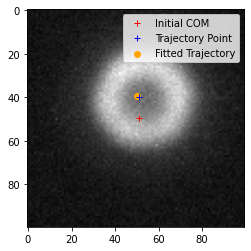

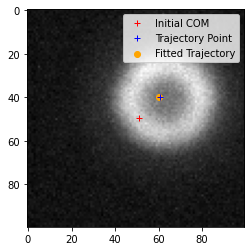

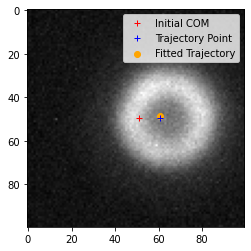

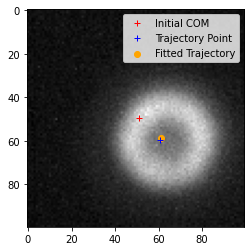

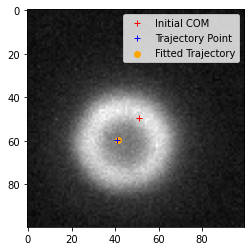

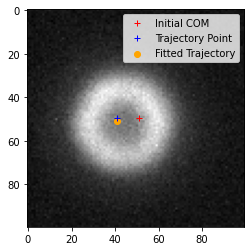

In [82]:
import matplotlib.pyplot as plt
# import other necessary libraries here

# Assuming center_of_mass, trajectory_corr, etc. are defined elsewhere...

initial_com = center_of_mass(img_list[0])

for image, point in zip(img_list, trajectory):
    plt.imshow(image, cmap='gray')  # assuming grayscale images
    plt.plot(initial_com[1], initial_com[0], 'r+', label='Initial COM')
    plt.plot(initial_com[1] - point[1], initial_com[0] - point[0], 'b+', label='Trajectory Point')
    
    fitted_trajectory = trajectory_corr(np.array([img_list[0], image]))
    plt.scatter(initial_com[1] + fitted_trajectory[-1, 1], initial_com[0] + fitted_trajectory[-1, 0], color='orange', label='Fitted Trajectory')
    
    plt.legend()  # to show labels
    plt.show()
